[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JQ--4LJJj-h0wf91bpKnKyj6jDET-WfV#scrollTo=dUz09eWFMEMr)
       

# Train YOLO Models in Google Colab

In [3]:
%%writefile /content/train_val_split.py
# Split between train and val folders

from pathlib import Path
import random
import os
import sys
import shutil
import argparse


# Define and parse user input arguments

parser = argparse.ArgumentParser()
parser.add_argument('--datapath', help='Path to data folder containing image and annotation files',
                    required=True)
parser.add_argument('--train_pct', help='Ratio of images to go to train folder; \
                    the rest go to validation folder (example: ".8")',
                    default=.8)

args = parser.parse_args()

data_path = args.datapath
train_percent = float(args.train_pct)

# Check for valid entries
if not os.path.isdir(data_path):
   print('Directory specified by --datapath not found. Verify the path is correct (and uses double back slashes if on Windows) and try again.')
   sys.exit(0)
if train_percent < .01 or train_percent > 0.99:
   print('Invalid entry for train_pct. Please enter a number between .01 and .99.')
   sys.exit(0)
val_percent = 1 - train_percent

# Define path to input dataset
input_image_path = os.path.join(data_path,'images')
input_label_path = os.path.join(data_path,'labels')

# Define paths to image and annotation folders
cwd = os.getcwd()
train_img_path = os.path.join(cwd,'data/train/images')
train_txt_path = os.path.join(cwd,'data/train/labels')
val_img_path = os.path.join(cwd,'data/validation/images')
val_txt_path = os.path.join(cwd,'data/validation/labels')

# Create folders if they don't already exist
for dir_path in [train_img_path, train_txt_path, val_img_path, val_txt_path]:
   if not os.path.exists(dir_path):
      os.makedirs(dir_path)
      print(f'Created folder at {dir_path}.')


# Get list of all images and annotation files
img_file_list = [path for path in Path(input_image_path).rglob('*')]
txt_file_list = [path for path in Path(input_label_path).rglob('*')]

print(f'Number of image files: {len(img_file_list)}')
print(f'Number of annotation files: {len(txt_file_list)}')

# Determine number of files to move to each folder
file_num = len(img_file_list)
train_num = int(file_num*train_percent)
val_num = file_num - train_num
print('Images moving to train: %d' % train_num)
print('Images moving to validation: %d' % val_num)

# Select files randomly and copy them to train or val folders
for i, set_num in enumerate([train_num, val_num]):
  for ii in range(set_num):
    img_path = random.choice(img_file_list)
    img_fn = img_path.name
    base_fn = img_path.stem
    txt_fn = base_fn + '.txt'
    txt_path = os.path.join(input_label_path,txt_fn)

    if i == 0: # Copy first set of files to train folders
      new_img_path, new_txt_path = train_img_path, train_txt_path
    elif i == 1: # Copy second set of files to the validation folders
      new_img_path, new_txt_path = val_img_path, val_txt_path

    shutil.copy(img_path, os.path.join(new_img_path,img_fn))
    #os.rename(img_path, os.path.join(new_img_path,img_fn))
    if os.path.exists(txt_path): # If txt path does not exist, this is a background image, so skip txt file
      shutil.copy(txt_path,os.path.join(new_txt_path,txt_fn))
      #os.rename(txt_path,os.path.join(new_txt_path,txt_fn))

    img_file_list.remove(img_path)

Writing /content/train_val_split.py


In [4]:
!wc -l /content/train_val_split.py

86 /content/train_val_split.py


In [5]:
!ls -l

total 44128
drwxr-xr-x 4 root root     4096 Jun 22 14:53 custom_data
-rw-r--r-- 1 root root 45172966 Jan  6 23:48 data.zip
drwxr-xr-x 1 root root     4096 Jun 18 13:35 sample_data
-rw-r--r-- 1 root root     3203 Jun 22 14:54 train_val_split.py


In [6]:
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 162
Number of annotation files: 162
Images moving to train: 145
Images moving to validation: 17


In [9]:
!ls -laR | head -25

.:
total 44144
drwxr-xr-x 1 root root     4096 Jun 22 14:56 .
drwxr-xr-x 1 root root     4096 Jun 22 14:52 ..
drwxr-xr-x 4 root root     4096 Jun 18 13:35 .config
drwxr-xr-x 4 root root     4096 Jun 22 14:53 custom_data
drwxr-xr-x 4 root root     4096 Jun 22 14:56 data
-rw-r--r-- 1 root root 45172966 Jan  6 23:48 data.zip
drwxr-xr-x 1 root root     4096 Jun 18 13:35 sample_data
-rw-r--r-- 1 root root     3203 Jun 22 14:54 train_val_split.py

./.config:
total 60
drwxr-xr-x 4 root root  4096 Jun 18 13:35 .
drwxr-xr-x 1 root root  4096 Jun 22 14:56 ..
-rw-r--r-- 1 root root     7 Jun 18 13:34 active_config
-rw-r--r-- 1 root root     0 Jun 18 13:35 config_sentinel
drwxr-xr-x 2 root root  4096 Jun 18 13:34 configurations
-rw-r--r-- 1 root root 12288 Jun 18 13:34 default_configs.db
-rw------- 1 root root     5 Jan  1  2040 gce
-rw-r--r-- 1 root root 12288 Jun 18 13:35 hidden_gcloud_config_universe_descriptor_data_cache_configs.db
-rw-r--r-- 1 root root     3 Jun 18 13:34 .last_opt_in_prompt.

In [10]:

!pip install -U ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00


In [11]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 11
names:
- MMs_peanut
- MMs_regular
- airheads
- gummy_worms
- milky_way
- nerds
- skittles
- snickers
- starbust
- three_musketeers
- twizzlers


## Train Model

In [12]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 185MB/s]
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

## Test Model

In [13]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,057 parameters, 0 gradients, 21.3 GFLOPs

image 1/17 /content/data/validation/images/09e892af-candy_87.jpg: 480x640 1 MMs_regular, 1 gummy_worms, 1 nerds, 1 snickers, 1 starbust, 74.5ms
image 2/17 /content/data/validation/images/1600f5b1-candy_94.jpg: 480x640 2 milky_ways, 1 skittles, 29.4ms
image 3/17 /content/data/validation/images/3b1b0191-candy_30.jpg: 384x640 1 MMs_regular, 1 gummy_worms, 1 starbust, 1 twizzlers, 94.1ms
image 4/17 /content/data/validation/images/3eace8b6-candy_49.jpg: 384x640 2 airheadss, 1 gummy_worms, 1 nerds, 1 three_musketeers, 10.9ms
image 5/17 /content/data/validation/images/426f5963-candy_45.jpg: 384x640 1 MMs_peanut, 1 MMs_regular, 1 airheads, 1 milky_way, 1 three_musketeers, 10.8ms
image 6/17 /content/data/validation/images/441e184f-candy_4.jpg: 384x640 1 MMs_peanut, 1 MMs_regular, 1 milky_way, 1 skittles, 10.8ms
image 7/17 /conten

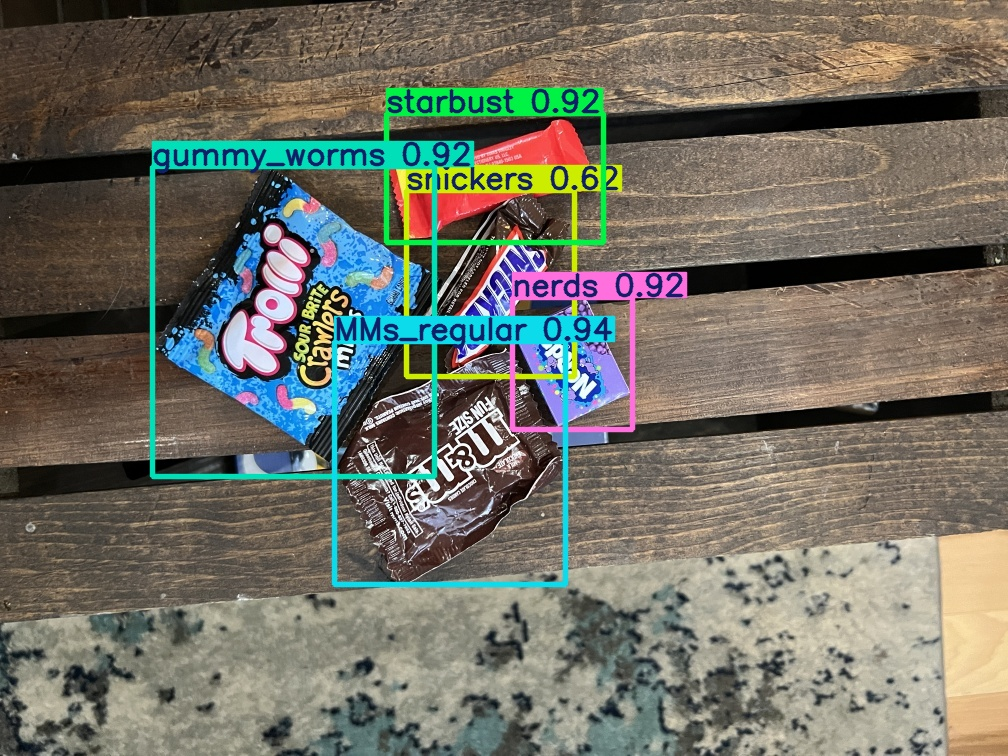

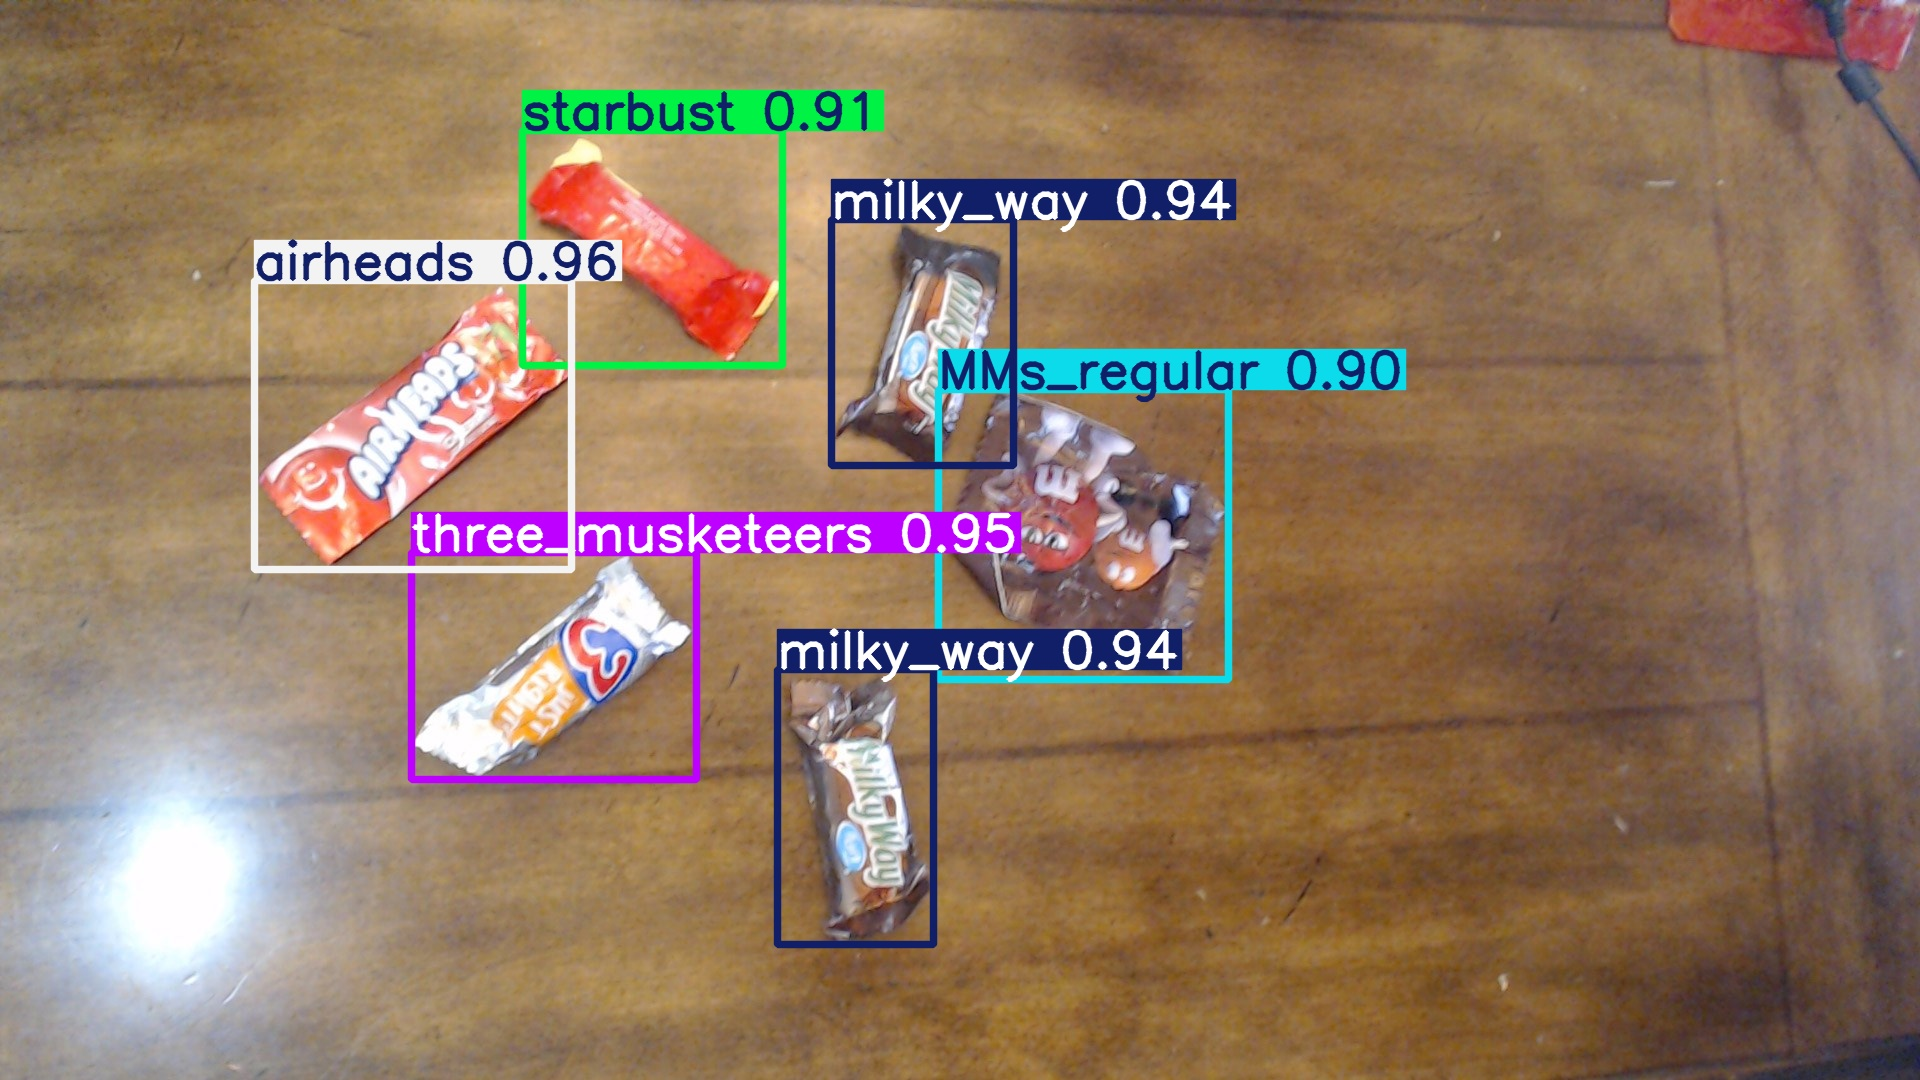

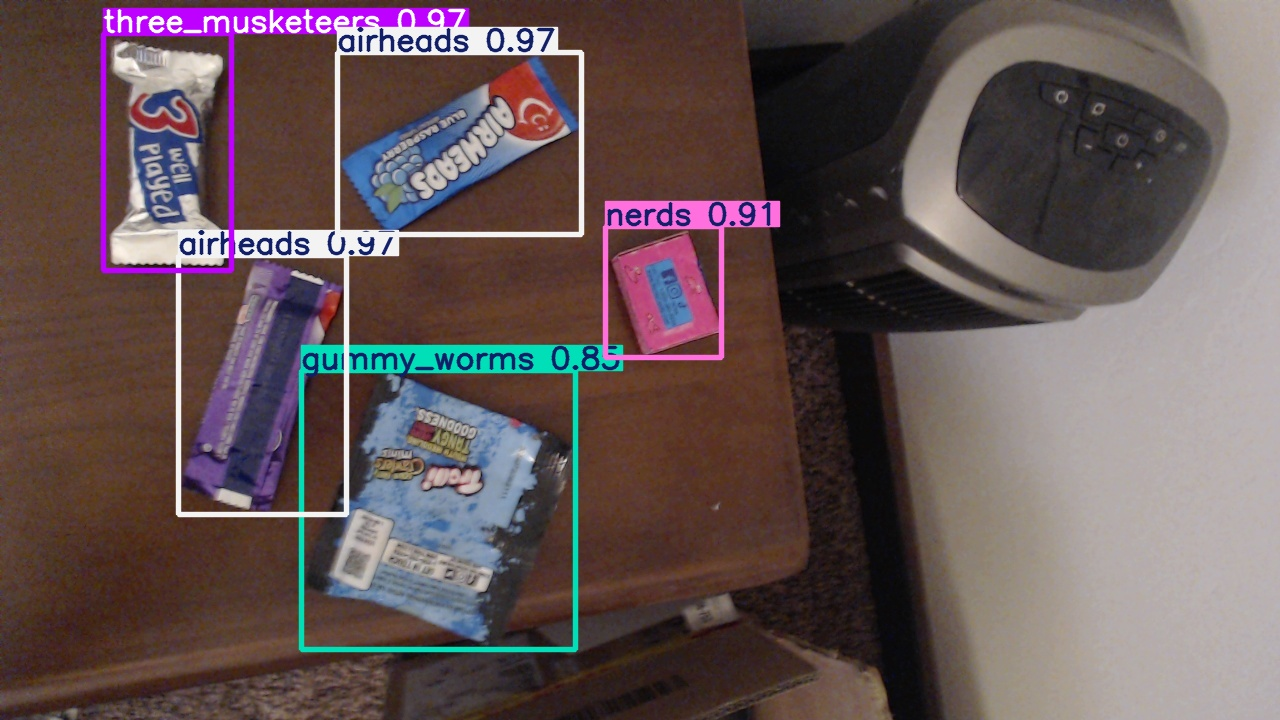

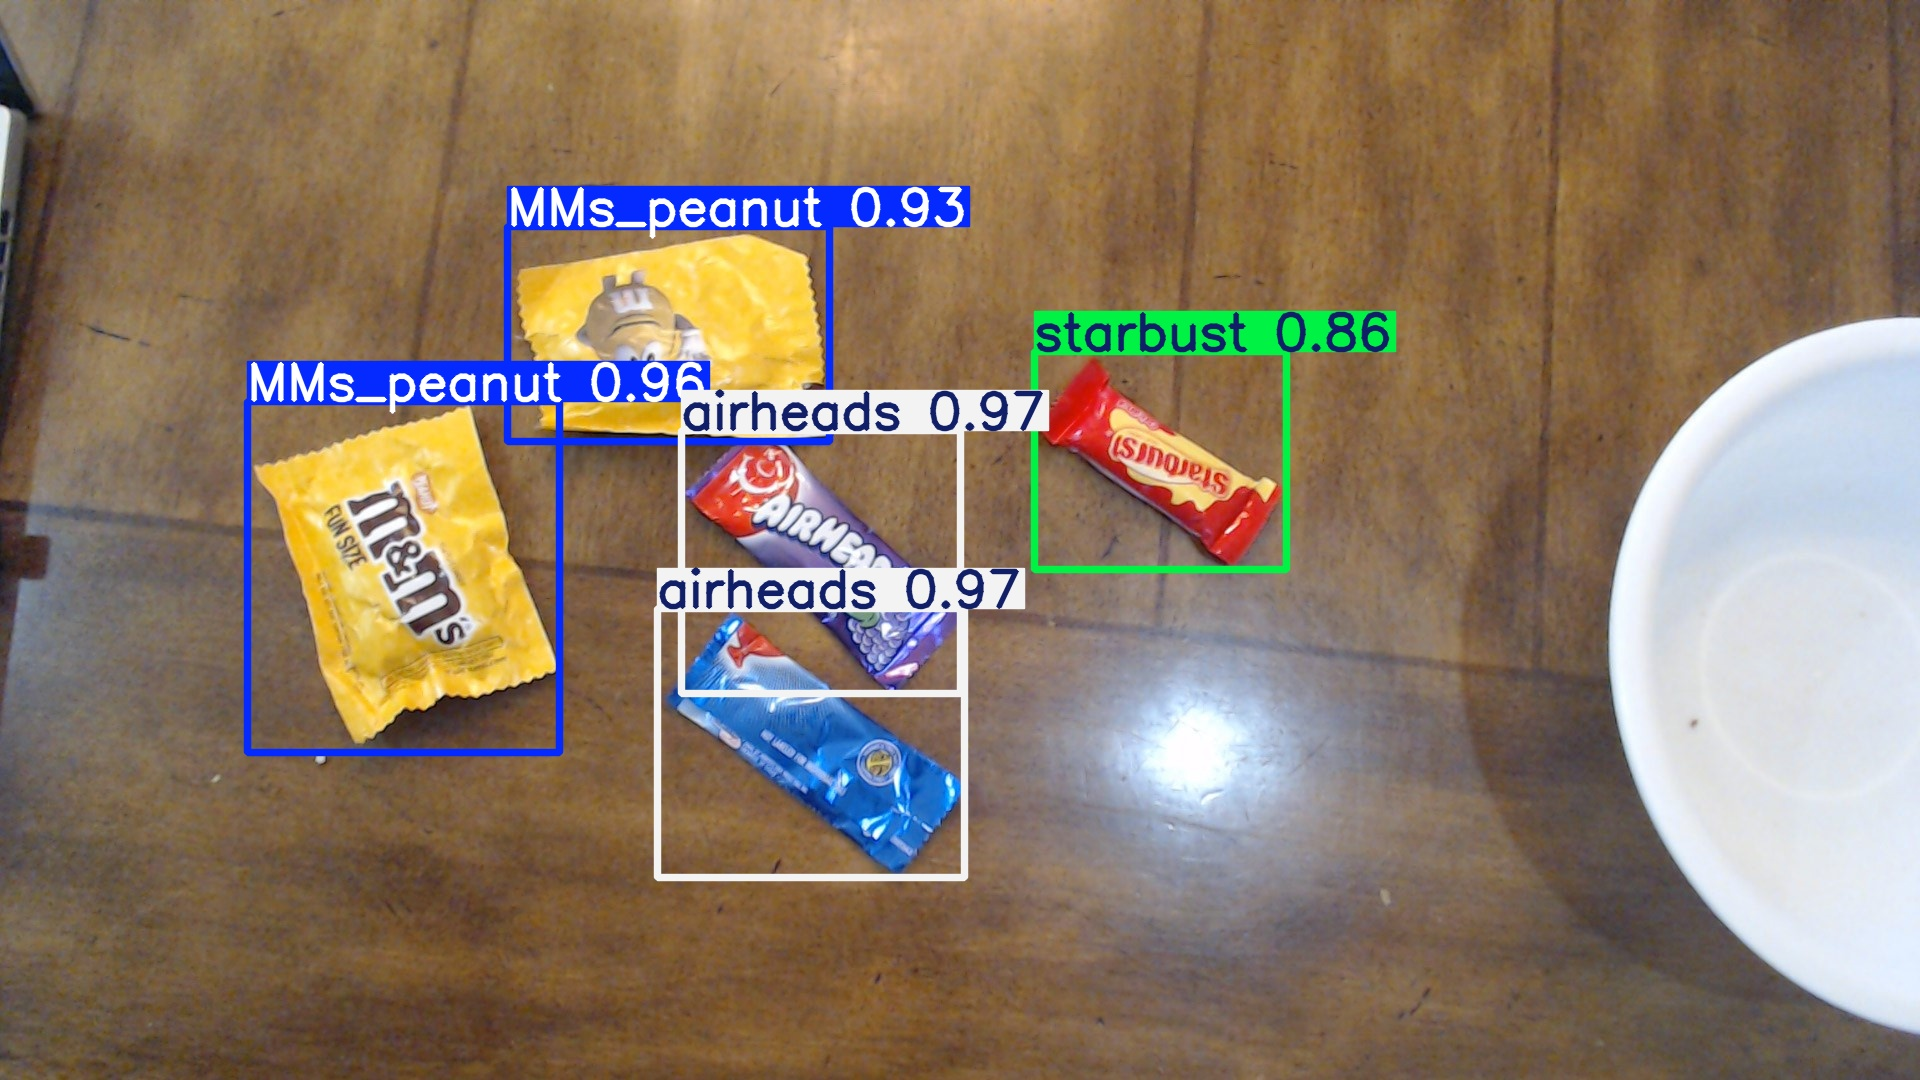

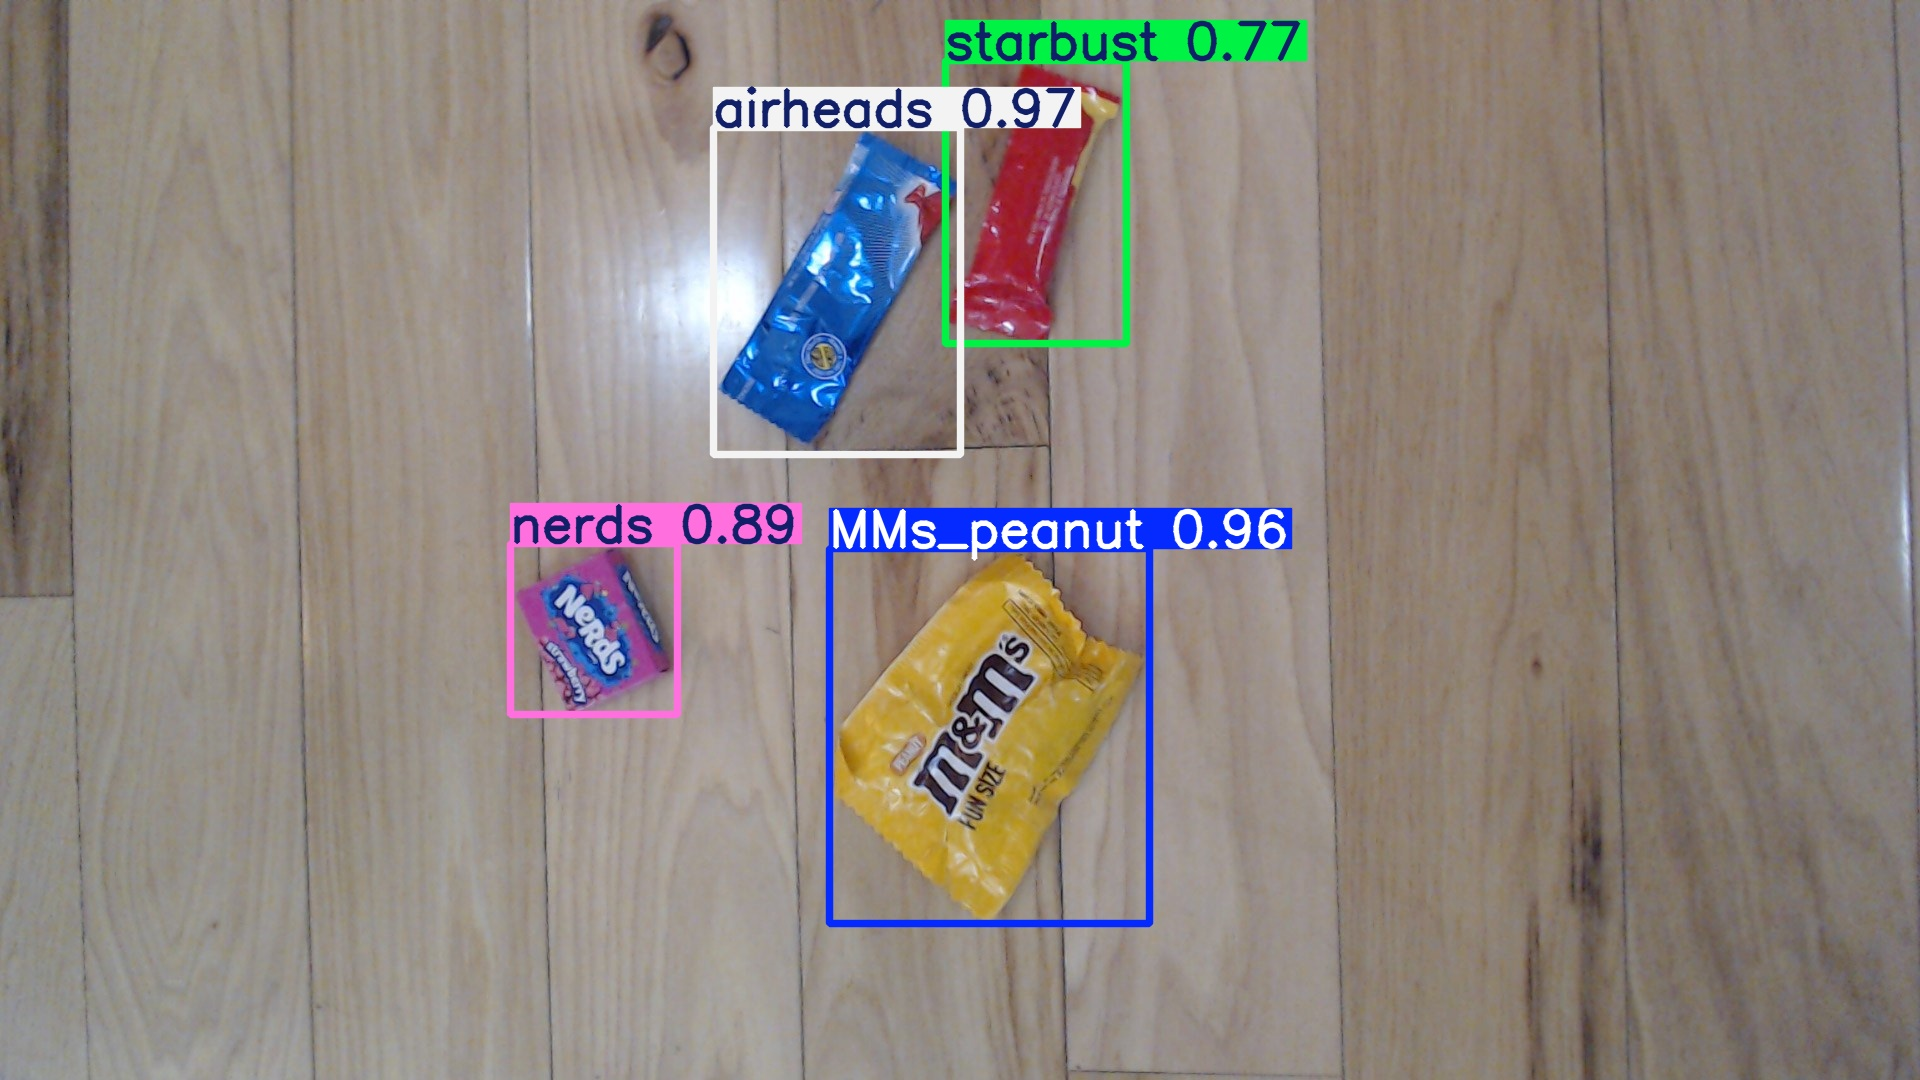

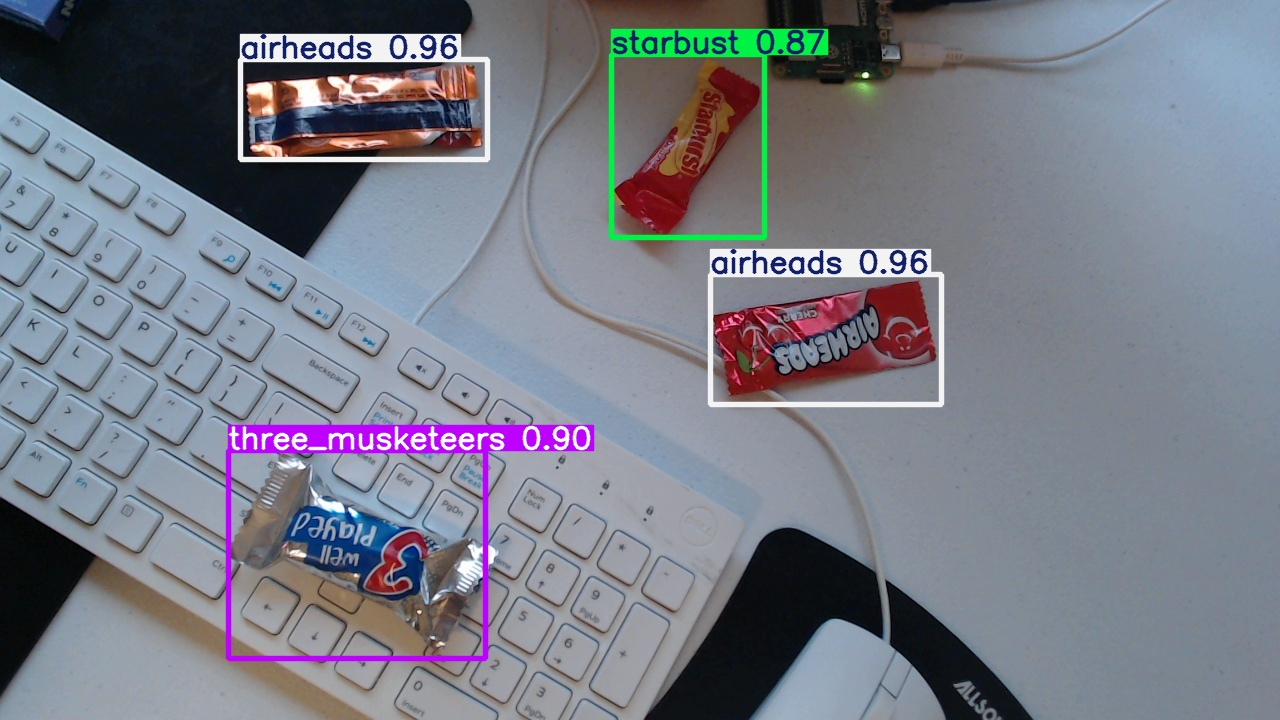

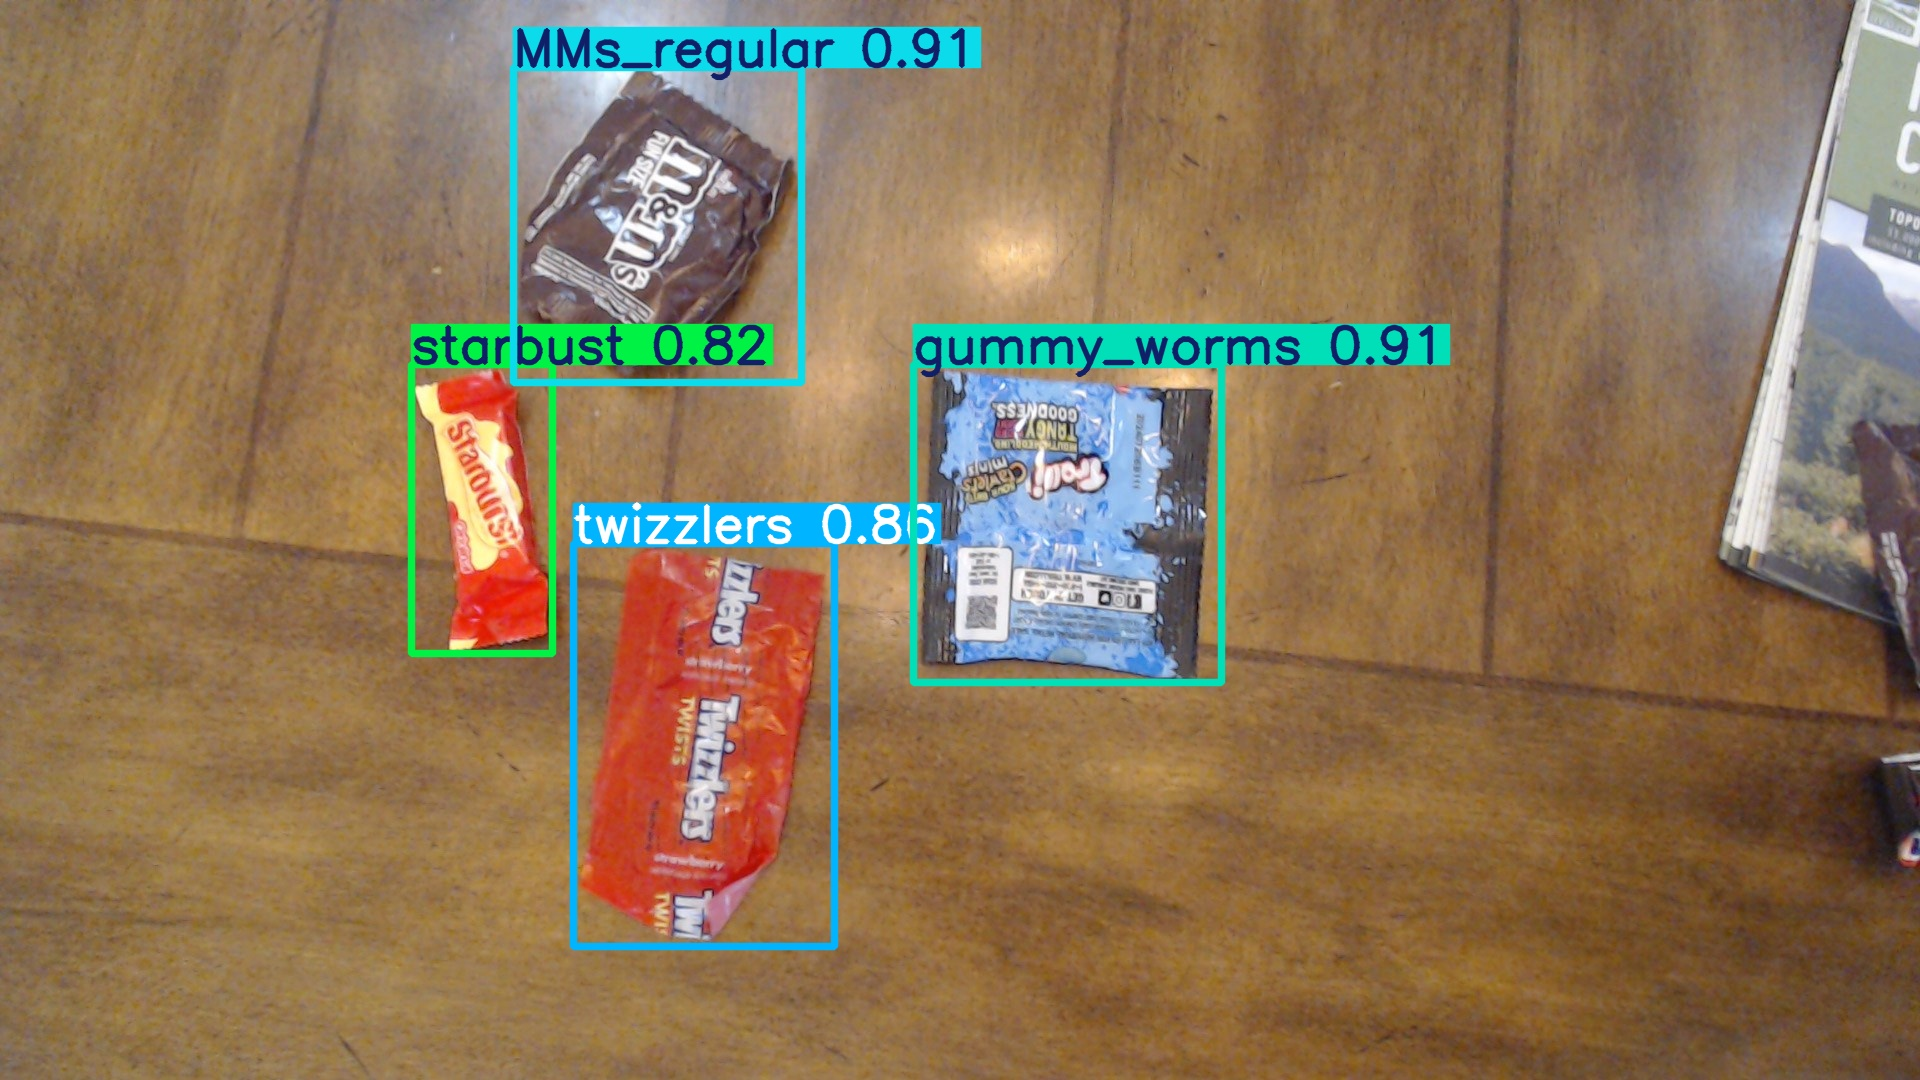

In [16]:

import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[2:9]:
  display(Image(filename=image_path, height=400))
  print('\n')